# Year 2023 Day 25


In [1]:
from advent_of_code.y_2023.problem_202325 import create_bidirectional
from advent_of_code.common.common import get_puzzle_input_file_path
from advent_of_code.y_2023.problem_202325 import (
    parse_text_input,
)
from advent_of_code.common.store import ExampleInputsStore

from advent_of_code.common.graph_visualization import construct_dot_graph_from_dict

## Test input


In [2]:
EXAMPLE_INPUT = ExampleInputsStore.from_private_resources_repository(2023).retrieve(
    "test_problem_202325"
)

In [3]:
text = EXAMPLE_INPUT
components = parse_text_input(text)
components

{'jqt': ('rhn', 'xhk', 'nvd'),
 'rsh': ('frs', 'pzl', 'lsr'),
 'xhk': ('hfx',),
 'cmg': ('qnr', 'nvd', 'lhk', 'bvb'),
 'rhn': ('xhk', 'bvb', 'hfx'),
 'bvb': ('xhk', 'hfx'),
 'pzl': ('lsr', 'hfx', 'nvd'),
 'qnr': ('nvd',),
 'ntq': ('jqt', 'hfx', 'bvb', 'xhk'),
 'nvd': ('lhk',),
 'lsr': ('lhk',),
 'rzs': ('qnr', 'cmg', 'lsr', 'rsh'),
 'frs': ('qnr', 'lhk', 'lsr')}

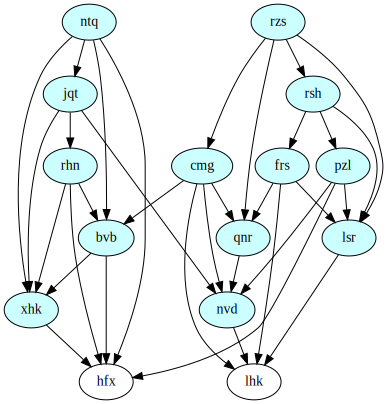

In [4]:
construct_dot_graph_from_dict(components, dir="forward", nodesep="0.1")

The edges to cut can be guessed by drawing an imaginary line between the two clusters.
All edges intersecting this cluster are to be cut.
This observation can also be made on the actual input... though more difficult
to manually analyze from the visualization (the graph is huge)


In [5]:
len(components.keys())

13

In [6]:
sum(len(e) for e in components.values())

33

In [7]:
nodes_to_disconnect = {
    "cmg",
    "jqt",
    "pzl",
}
disconnected = {k: () if k in nodes_to_disconnect else v for k, v in components.items()}
len(disconnected.keys())

13

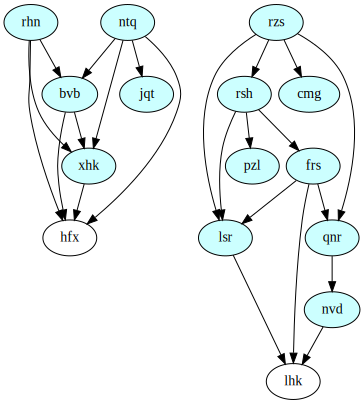

In [8]:
construct_dot_graph_from_dict(disconnected, dir="forward", nodesep="0.1")

In [9]:
disconnected

{'jqt': (),
 'rsh': ('frs', 'pzl', 'lsr'),
 'xhk': ('hfx',),
 'cmg': (),
 'rhn': ('xhk', 'bvb', 'hfx'),
 'bvb': ('xhk', 'hfx'),
 'pzl': (),
 'qnr': ('nvd',),
 'ntq': ('jqt', 'hfx', 'bvb', 'xhk'),
 'nvd': ('lhk',),
 'lsr': ('lhk',),
 'rzs': ('qnr', 'cmg', 'lsr', 'rsh'),
 'frs': ('qnr', 'lhk', 'lsr')}

In [10]:
bidir = create_bidirectional(disconnected)
bidir

{'jqt': {'ntq'},
 'rsh': {'frs', 'lsr', 'pzl', 'rzs'},
 'xhk': {'bvb', 'hfx', 'ntq', 'rhn'},
 'cmg': {'rzs'},
 'rhn': {'bvb', 'hfx', 'xhk'},
 'bvb': {'hfx', 'ntq', 'rhn', 'xhk'},
 'pzl': {'rsh'},
 'qnr': {'frs', 'nvd', 'rzs'},
 'ntq': {'bvb', 'hfx', 'jqt', 'xhk'},
 'nvd': {'lhk', 'qnr'},
 'lsr': {'frs', 'lhk', 'rsh', 'rzs'},
 'rzs': {'cmg', 'lsr', 'qnr', 'rsh'},
 'frs': {'lhk', 'lsr', 'qnr', 'rsh'},
 'hfx': {'bvb', 'ntq', 'rhn'},
 'lhk': {'frs', 'lsr'}}

## Actual input


In [11]:
text = (get_puzzle_input_file_path(2023, 25)).read_text()
components = parse_text_input(text)
components["hcp"]

('xhl', 'mrh', 'zhh')

In [12]:
len(components.keys())

1261

In [13]:
sum(len(e) for e in components.values())

3462

In [14]:
disconnected = {
    k: v
    for k, v in components.items()
    if k
    not in {
        "vgf",
        "nmz",
        "fdb",
    }
}

In [15]:
len(disconnected.keys())

1258

In [16]:
# dsdsdsdsd

Manual observation:

- vgf - jpn
- nmz - mnl
- fdb - txm


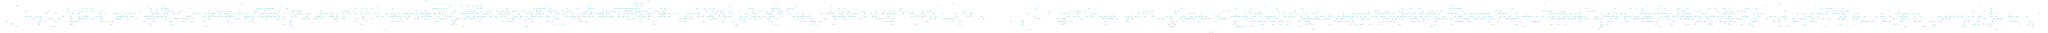

In [17]:
construct_dot_graph_from_dict(components, nodesep="0.25")

In [18]:
construct_dot_graph_from_dict(disconnected, nodesep="0.25")